# Contents
- Import Libraries and Data
- Check and Graph Data
- Time Series Analysis: Decomposition
- Testing For Stationarity
- Stationarizing the Data

# 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#Import DF
path = r'C:\Users\kesmc\Documents\2023 Bouldering Analysis'

In [3]:
checkin=pd.read_csv(os.path.join( path, 'Data', 'Checkin_Count.csv'))

In [4]:
checkin.head(10)

,Hour,Checkin_Count
0,3/31/2022 12AM,0
1,3/31/2022 1AM,0
2,3/31/2022 2AM,0
3,3/31/2022 3AM,0
4,3/31/2022 4AM,0
5,3/31/2022 5AM,0
6,3/31/2022 6AM,33
7,3/31/2022 7AM,30
8,3/31/2022 8AM,35
9,3/31/2022 9AM,24


Original Data was recieved from a local climbing gym tracking the time when someone would check into the climbing gym. It is just data from two days 3/31/2022 and 4/1/2022.
Data was cleaned and converted to an count of each hour in Excel

In [5]:
checkin.shape

(48, 2)

In [6]:
checkin.columns

Index(['Hour', 'Checkin_Count'], dtype='object')

### 2. Graph and check data

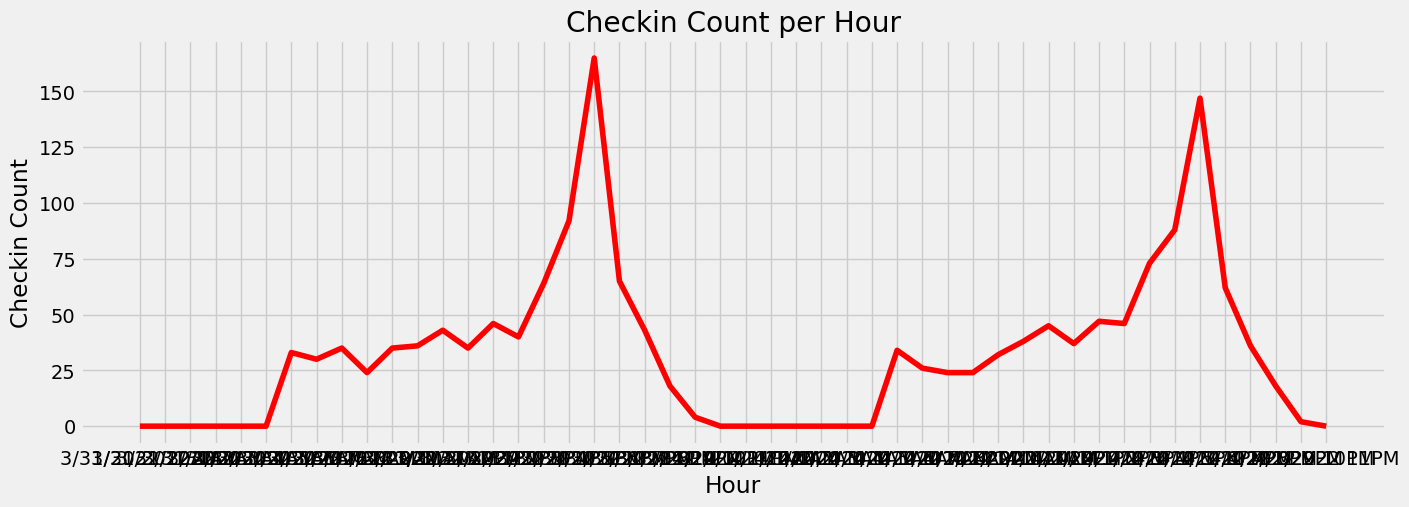

In [7]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(checkin['Hour'], checkin['Checkin_Count'], color='red')
plt.title('Checkin Count per Hour')
plt.xlabel('Hour')
plt.ylabel('Checkin Count')
plt.show()

There is a clear daily pattern where there are no checkins from 11:00PM - 6:00AM when the gym is closed. There is also a clear afterwork spike sduirn the 5PM and 6PM spike with a steep decline until the gym closes. I would be interested in seeing the weekly pattern. 

In [8]:
# Check for missing values
checkin.isnull().sum() 

Hour             0
Checkin_Count    0
dtype: int64

In [9]:
# Check for duplicates
dups = checkin.duplicated()
dups.sum()

0

### 3. Time-series analysis: decomposition

In [10]:
# Set the "Hour" column as the index

from datetime import datetime

checkin['datetime'] = pd.to_datetime(checkin['Hour']) # Create a datetime column from "Date.""
checkin = checkin.set_index('datetime') # Set the datetime as the index of the dataframe.
checkin.drop(['Hour'], axis=1, inplace=True) # Drop the "Hour" column.
checkin.head()

,Checkin_Count
datetime,
2022-03-31 00:00:00,0
2022-03-31 01:00:00,0
2022-03-31 02:00:00,0
2022-03-31 03:00:00,0
2022-03-31 04:00:00,0


In [11]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(checkin, model='additive')

In [12]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

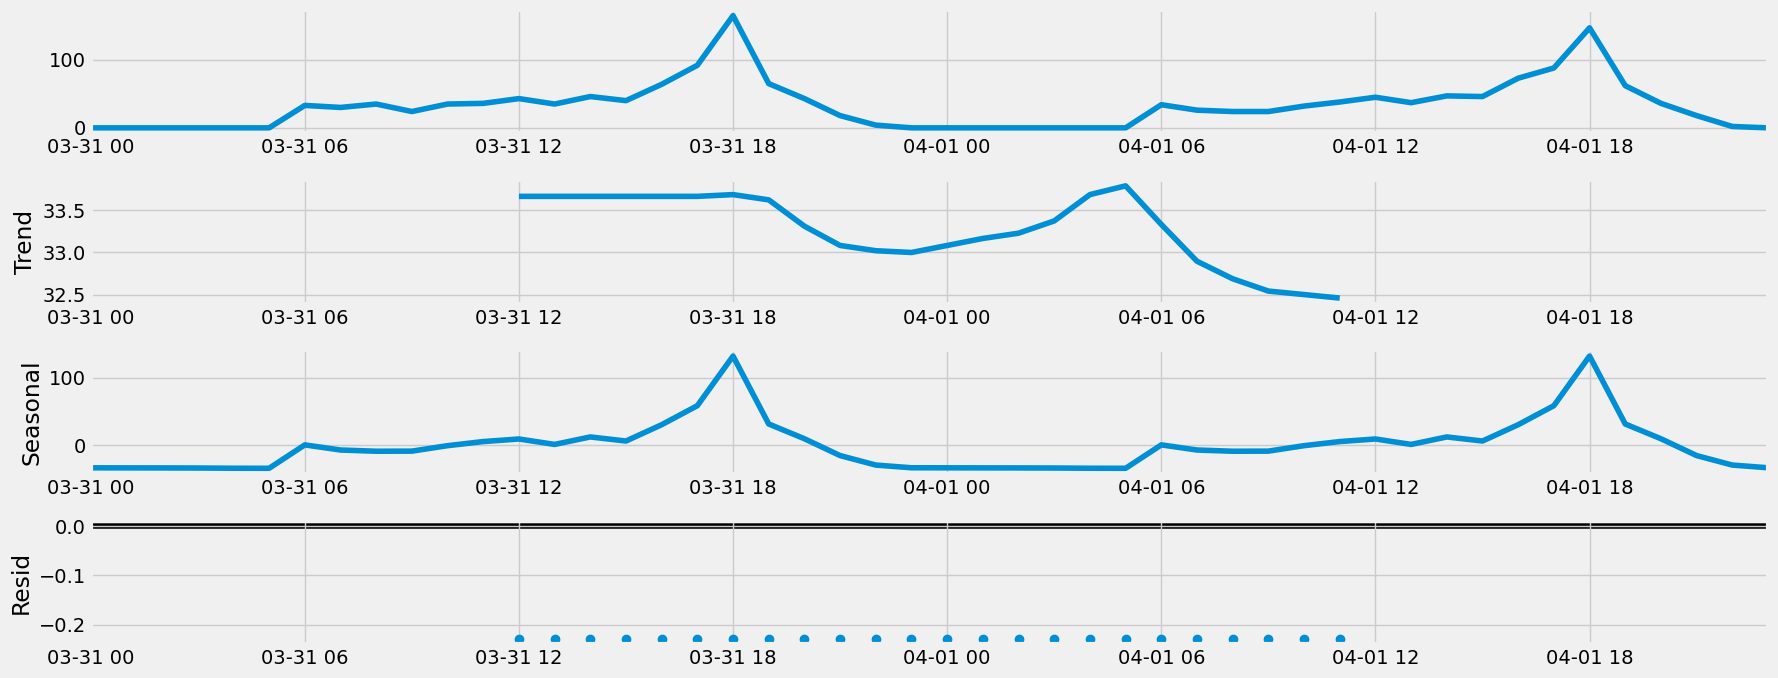

In [13]:
# Plot the separate components
decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [14]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(checkin['Checkin_Count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.756113
p-value                         0.064821
Number of Lags Used             0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


The null hypothesis is the presence of a unit root at significance value 5%
If disproved it means the data is stationary
(If there is no unit root data is not stationary)
Test statistic smaller than critical value at 5% so null hypothesis can be rejected - no unit root

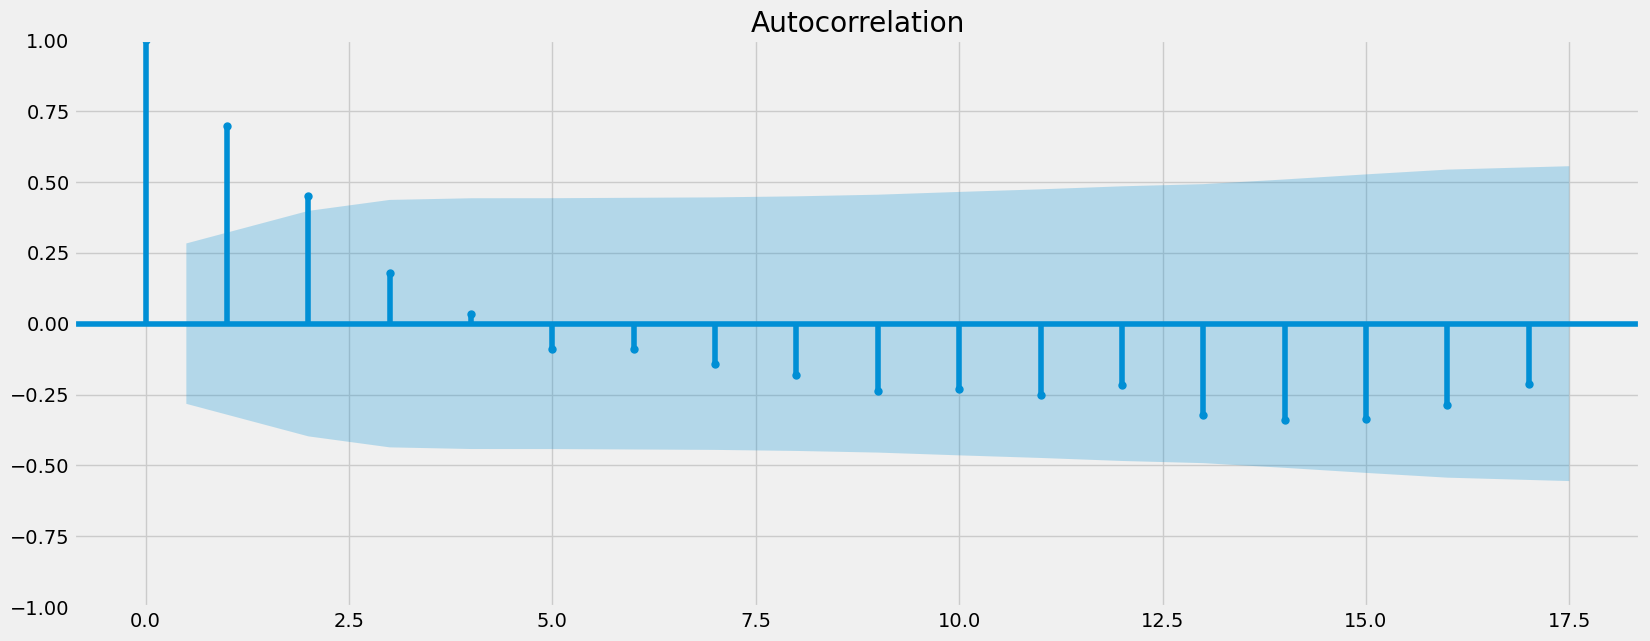

In [15]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(checkin)
plt.show()

### 5. Stationarizing the Data

Data does not need to be Stationized but I've included the steps I would take to do so if were necessary

In [16]:
data_diff = checkin - checkin.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [17]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [18]:
data_diff.head()

,Checkin_Count
datetime,
2022-03-31 01:00:00,0.0
2022-03-31 02:00:00,0.0
2022-03-31 03:00:00,0.0
2022-03-31 04:00:00,0.0
2022-03-31 05:00:00,0.0


In [19]:
data_diff.columns

Index(['Checkin_Count'], dtype='object')

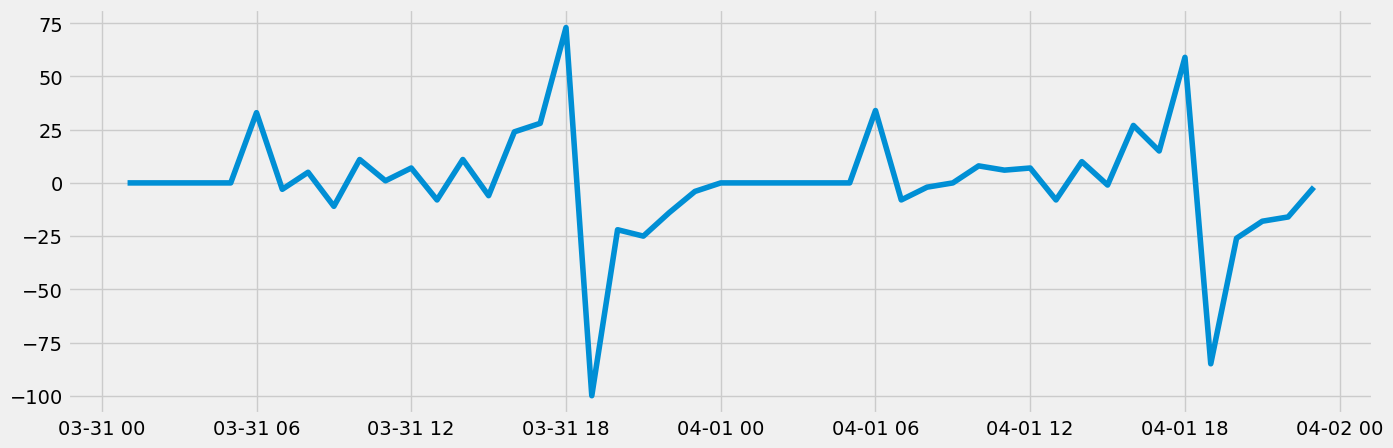

In [20]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [21]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.270222e+00
p-value                        1.595605e-10
Number of Lags Used            0.000000e+00
Number of Observations Used    4.600000e+01
Critical Value (1%)           -3.581258e+00
Critical Value (5%)           -2.926785e+00
Critical Value (10%)          -2.601541e+00
dtype: float64


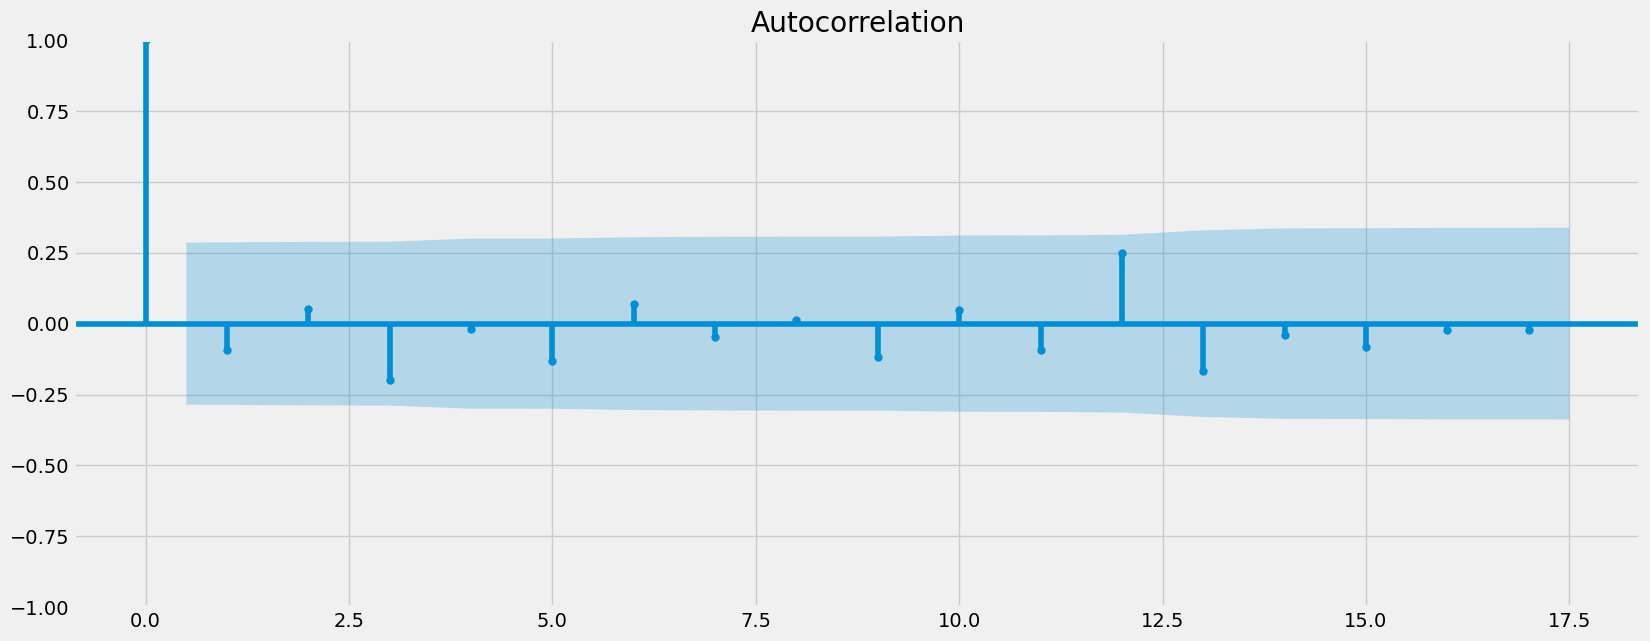

In [22]:
plot_acf(data_diff)
plt.show()